# Proyecto de predicción de fugas de clientes en compañía telefónica
### Script por Manuel Sánchez-Montañés

In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
COLAB = True

In [3]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1yPBvhHcg90ADaypGGoGzWUI1UDGVwQR4',
                                        dest_path='./fuga_clientes_empresa_telefonica_explotacion.csv')

## **Carga de los datos**

In [4]:
df = pd.read_csv("./fuga_clientes_empresa_telefonica_explotacion.csv")

In [5]:
pd.options.display.max_columns = None

In [6]:
df

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
0,ADF1330,888,29.60,878.6500,8.76,47.50,115805.2080,237,16570,19751,1,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
1,ADF1331,120,4.00,878.7200,294.00,6.25,696816.2705,77,2208,419,3,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0
2,ADF1345,3809,126.97,898.4900,15.75,0.00,464885.6963,308,762,6850,2,NaN,0,0,1,0,0,0,0,0,0,0,1,0,0
3,ADF1349,108,3.60,904.3220,155.66,80.00,799300.8506,84,27197,1790,1,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0
4,ADF1363,795,26.50,920.1420,0.00,0.00,47665.3779,1582,0,2441,2,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,ADF1956,136,4.53,270.3344,6.58,2.50,7410.7529,62,9504,10820,1,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1
285,ADF1965,1795,59.83,1024.8460,111.99,10.00,493671.9863,149,18202,40730,2,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1
286,ADF1967,203,6.77,1143.4972,19.84,13.75,261.9307,284,360,81341,3,NaN,0,0,0,0,0,0,1,0,0,0,0,0,1
287,ADF1971,109,3.63,45.0900,0.00,0.00,658162.2734,20,240,3611,1,NaN,0,0,0,0,1,0,0,0,0,0,0,0,1


In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
df.isnull().sum()

Customer ID                                               0
network_age                                               0
Customer tenure in month                                  0
Total Spend in Months 1 and 2 of 2017                     0
Total SMS Spend                                           0
Total Data Spend                                          0
Total Data Consumption                                    0
Total Unique Calls                                        0
Total Onnet spend                                         0
Total Offnet spend                                        0
Total Call centre complaint calls                         0
Churn Status                                            289
Most Loved Competitor network in in Month 1_0             0
Most Loved Competitor network in in Month 1_Mango         0
Most Loved Competitor network in in Month 1_PQza          0
Most Loved Competitor network in in Month 1_ToCall        0
Most Loved Competitor network in in Mont

### **Creación de variables sintéticas nuevas**

In [10]:
df["ratio"] = df["Total Unique Calls"] / df["Total Spend in Months 1 and 2 of 2017"]

df["ratio2"] = df["Total Call centre complaint calls"] / df["Total Unique Calls"]

### **Chequeo que las columnas del dataset de construcción coinciden con las del dataset de explotación**

In [11]:
len(df), df["Customer ID"].nunique()

(289, 289)

In [12]:
df.set_index("Customer ID", inplace=True)

In [13]:
df.head(5)

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel,ratio,ratio2
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,
ADF1330,888,29.60,878.650,8.76,47.50,115805.2080,237,16570,19751,1,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0,0.269732,0.004219
ADF1331,120,4.00,878.720,294.00,6.25,696816.2705,77,2208,419,3,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,0.087627,0.038961
ADF1345,3809,126.97,898.490,15.75,0.00,464885.6963,308,762,6850,2,NaN,0,0,1,0,0,0,0,0,0,0,1,0,0,0.342797,0.006494
ADF1349,108,3.60,904.322,155.66,80.00,799300.8506,84,27197,1790,1,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,0.092887,0.011905
ADF1363,795,26.50,920.142,0.00,0.00,47665.3779,1582,0,2441,2,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,1.719300,0.001264


In [15]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1XsH7YbGerbaSm2UagEgNQxPIhAO30zYs',
                                        dest_path='./datos_adicionales_modelo_ejercicio1.pkl')
    gdd.download_file_from_google_drive(file_id='1KABdwWkmMv3Gy0haMLDSGhENWfK5L5Ak',
                                        dest_path='./best_model_ejercicio1.h5')

In [18]:
import pickle

with open("datos_adicionales_modelo_ejercicio1.pkl", "rb") as f:
  datos_modelo = pickle.load(f)

datos_modelo

{'fecha': '13/10/2023',
 'scaler': StandardScaler(),
 'variables_usadas': ['network_age',
  'Total Spend in Months 1 and 2 of 2017',
  'Total SMS Spend',
  'Total Data Spend',
  'Total Data Consumption',
  'Total Unique Calls',
  'Total Onnet spend',
  'Total Offnet spend',
  'Total Call centre complaint calls',
  'Most Loved Competitor network in in Month 1_0',
  'Most Loved Competitor network in in Month 1_Mango',
  'Most Loved Competitor network in in Month 1_PQza',
  'Most Loved Competitor network in in Month 1_ToCall',
  'Most Loved Competitor network in in Month 1_Uxaa',
  'Most Loved Competitor network in in Month 1_Weematel',
  'Most Loved Competitor network in in Month 1_Zintel',
  'Most Loved Competitor network in in Month 2_Mango',
  'Most Loved Competitor network in in Month 2_PQza',
  'Most Loved Competitor network in in Month 2_ToCall',
  'Most Loved Competitor network in in Month 2_Uxaa',
  'Most Loved Competitor network in in Month 2_Weematel',
  'Most Loved Competitor 

In [20]:
import keras

model = keras.models.load_model("./best_model_ejercicio1.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 10)                250       
                                                                 
 capa_oculta (Dense)         (None, 3)                 33        
                                                                 
 capa_salida (Dense)         (None, 2)                 8         
                                                                 
Total params: 291 (1.14 KB)
Trainable params: 291 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
X = df[datos_modelo["variables_usadas"]]

In [ ]:
# Estandarización de x:
# x_est = (x - media_train(x)) / std_train(x)
# media(x_est) = 0
# std(x_est) = 1

In [22]:
scaler = datos_modelo["scaler"]

In [24]:
scaler.mean_

array([1.55359116e+03, 9.10757919e+02, 3.28379926e+01, 8.16743831e+01,
       2.36964418e+06, 2.14324125e+02, 6.72742726e+03, 1.73565727e+04,
       2.02946593e+00, 3.86740331e-02, 1.28913444e-01, 2.54143646e-01,
       1.39963168e-01, 2.11786372e-01, 1.08655617e-01, 1.17863720e-01,
       1.03130755e-01, 2.22836096e-01, 4.23572744e-02, 5.72744015e-01,
       3.31491713e-02, 2.57826888e-02, 2.56677087e-01, 1.06583366e-01])

In [25]:
scaler.scale_

array([1.31051621e+03, 1.63114620e+03, 6.89514003e+01, 4.33800547e+02,
       7.09265929e+06, 3.25732434e+02, 1.43240799e+04, 4.16375979e+04,
       2.18968305e+00, 1.92816888e-01, 3.35104115e-01, 4.35378747e-01,
       3.46948814e-01, 4.08574234e-01, 3.11206642e-01, 3.22446683e-01,
       3.04129582e-01, 4.16149216e-01, 2.01402919e-01, 4.94680006e-01,
       1.79025986e-01, 1.58486409e-01, 3.03221218e-01, 3.71576968e-01])

In [26]:
X_est = pd.DataFrame(scaler.transform(X),
                     columns = X.columns,
                     index = X.index)

In [27]:
X_est.std()

network_age                                             0.966491
Total Spend in Months 1 and 2 of 2017                   0.583983
Total SMS Spend                                         1.001461
Total Data Spend                                        0.114922
Total Data Consumption                                  0.641558
Total Unique Calls                                      0.950420
Total Onnet spend                                       1.966644
Total Offnet spend                                      0.920458
Total Call centre complaint calls                       0.740442
Most Loved Competitor network in in Month 1_0           0.852330
Most Loved Competitor network in in Month 1_Mango       0.950719
Most Loved Competitor network in in Month 1_PQza        0.970960
Most Loved Competitor network in in Month 1_ToCall      0.997055
Most Loved Competitor network in in Month 1_Uxaa        1.088360
Most Loved Competitor network in in Month 1_Weematel    1.010061
Most Loved Competitor net

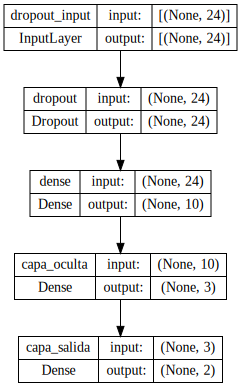

In [28]:
from IPython.display import SVG
from keras.utils import model_to_dot
display(SVG(model_to_dot(model, show_shapes=True,
                         dpi=72).create(prog="dot", format="svg")))

In [30]:
prob_churn = model.predict(X_est)[:,1]
prob_churn

10/10 [==============================] - 0s 2ms/step


array([0.39033565, 0.6469881 , 0.28763252, 0.525939  , 0.08093884,
       0.30802122, 0.18638931, 0.36637005, 0.518814  , 0.36944273,
       0.2511688 , 0.29757783, 0.49389008, 0.19122043, 0.27081704,
       0.36443776, 0.35765064, 0.41408122, 0.14763145, 0.30892584,
       0.10978029, 0.525939  , 0.06021458, 0.32694426, 0.19571878,
       0.525939  , 0.3031934 , 0.1276565 , 0.5932086 , 0.2783776 ,
       0.50717723, 0.45224857, 0.34479594, 0.24386667, 0.30645266,
       0.36772844, 0.39307618, 0.5143629 , 0.43835586, 0.1287643 ,
       0.47554624, 0.3219267 , 0.6741959 , 0.24231276, 0.25462517,
       0.33997488, 0.58679396, 0.28130022, 0.35461095, 0.525939  ,
       0.31589377, 0.32032514, 0.525939  , 0.3228663 , 0.27179566,
       0.20264515, 0.2888147 , 0.33160138, 0.19657685, 0.24857752,
       0.2682578 , 0.568634  , 0.29647392, 0.2773702 , 0.48889804,
       0.45123827, 0.37346768, 0.4458163 , 0.525939  , 0.525939  ,
       0.4944117 , 0.5181118 , 0.25396723, 0.31303397, 0.34477

In [32]:
df.drop("Churn Status", axis=1, inplace=True)
df.insert(0, "prob churn", prob_churn)

In [34]:
df.sort_values("prob churn", ascending=False)

,prob churn,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel,ratio,ratio2
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,
ADF0038,0.955032,117,3.90,49.6700,0.00,38.75,6.941061e+03,1,0,1092,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0.020133,1.000000
ADF0137,0.946876,987,32.90,3847.5000,155.75,280.00,3.703326e+05,544,52512,229965,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.141391,0.001838
ADF1895,0.946331,101,3.37,44.9700,0.61,0.00,3.132664e+05,11,348,3466,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.244608,0.090909
ADF1915,0.922271,1447,48.23,1256.5100,13.06,36.25,1.077175e+06,340,48,60629,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.270591,0.002941
ADF0603,0.911975,111,3.70,59.3204,11.97,0.00,6.944309e+03,15,564,2915,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0.252864,0.066667
ADF0585,0.902704,116,3.87,369.3900,1.75,20.00,2.447816e+03,10,120,7079,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0.027072,0.100000
ADF0607,0.900993,198,6.60,70.5280,26.52,0.00,2.222808e+05,37,240,3156,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0.524614,0.027027
ADF0106,0.898433,189,6.30,649.8600,10.76,1.25,6.400000e+01,281,4530,45501,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0.432401,0.003559
ADF0480,0.882636,839,27.97,136.7760,25.01,57.50,1.324256e+04,1,0,179,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.007311,1.000000


In [35]:
df.sort_values("prob churn", ascending=False).to_csv("predicciones_explotacion.csv", index=None)